In [1]:
# importing relevant libraries for hopfield networks and plotting
%matplotlib inline
import matplotlib.pyplot as plt
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools
import numpy as np

In [2]:
# the letters we want to store in the hopfield network

# only storing 2 patterns
letter_list_2_pattern = ['A', 'B'] 

# storing 3 patterns
letter_list_3_pattern = ['A', 'B', 'C']

In [3]:
# creting the patterns of the first 3 letter of the alphabet
letter_A_purple_green = [[ 1, -1, -1,  1], 
                         [-1,  1,  1, -1], 
                         [-1, -1, -1, -1],
                         [-1,  1,  1, -1],
                         [-1,  1,  1, -1]]

letter_B_purple_green = [[-1, -1, -1,  1], 
                         [-1,  1,  1, -1], 
                         [-1, -1, -1,  1],
                         [-1,  1,  1, -1],
                         [-1, -1, -1,  1]]

letter_C_purple_green = [[ 1, -1, -1,  1], 
                         [-1,  1,  1, -1], 
                         [-1,  1,  1,  1],
                         [-1,  1,  1, -1],
                         [ 1, -1, -1,  1]]

# turn the patterns into numpy arrays 
letter_A_array = np.array(letter_A_purple_green)
letter_B_array = np.array(letter_B_purple_green)
letter_C_array = np.array(letter_C_purple_green)

# include the patterns in a dictionary 
alphabet_2_pattern = {'A': letter_A_array, 'B': letter_B_array}
alphabet_3_pattern = {'A': letter_A_array, 'B': letter_B_array, 'C': letter_C_array}

size of the letters: (5, 4). The hopfield network is of the same size


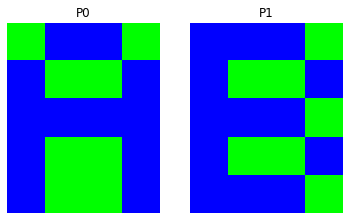

In [4]:
# access the first element and get the size which is (5, 4)
pattern_shape_green_purple = alphabet_2_pattern['A'].shape
print("size of the letters: {}. The hopfield network is of the same size".format(pattern_shape_green_purple))

# instance of the HopfieldNetwork class with number of neurons being 20
hopfield_net_green_purple = network.HopfieldNetwork(nr_neurons = pattern_shape_green_purple[0] * pattern_shape_green_purple[1])

# list using List Comprehension for plotting the patterns
pattern_list_green_purple = [alphabet_2_pattern[key] for key in letter_list_2_pattern ]
plot_tools.plot_pattern_list(pattern_list_green_purple)

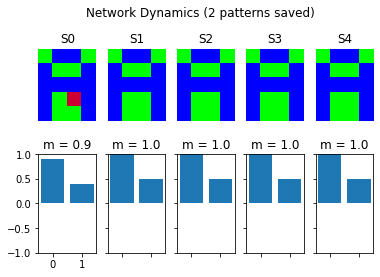

In [5]:
# store patterns in hopfield network
hopfield_net_green_purple.store_patterns(pattern_list_green_purple)

# include noise in pattern and initialize the network
noisy_init_state_green_purple = pattern_tools.get_noisy_copy(alphabet_2_pattern['A'], noise_level=0.2)
hopfield_net_green_purple.set_state_from_pattern(noisy_init_state_green_purple)

# given the initial state, the network dynamics evolve when run
states_green_purple = hopfield_net_green_purple.run_with_monitoring(nr_steps=4)

# reshape network state to same shape used to create the pattern
states_as_patterns_green_purple = pattern_tools.reshape_patterns(states_green_purple, pattern_list_green_purple[0].shape)

# plot of the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns_green_purple, 
                                           pattern_list_green_purple, reference_idx=0, 
                                           suptitle="Network Dynamics (2 patterns saved)")

When running the Hopfield Network and storing only two patterns, the simulation ends up in the expected pattern after a few steps. This is as expected when storing only 2 of the patterns.

In the next simulation, we will aim to see what happens when 3 patterns are stored.

letters are patterns of size: (5, 4). Create a network of corresponding size


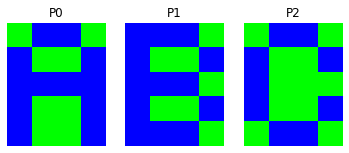

In [6]:
# access the first element and get the size which is (5, 4)
pattern_shape_green_purple = alphabet_3_pattern['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape_green_purple))

# instance of the HopfieldNetwork class with number of neurons being 20
hopfield_net_green_purple = network.HopfieldNetwork(nr_neurons = pattern_shape_green_purple[0]*pattern_shape_green_purple[1])

# list using List Comprehension for plotting the patterns
pattern_list_green_purple = [alphabet_3_pattern[key] for key in letter_list_3_pattern ]
plot_tools.plot_pattern_list(pattern_list_green_purple)

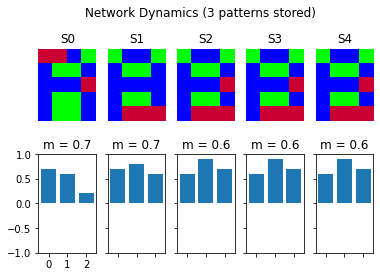

In [7]:
# store patterns in hopfield network
hopfield_net_green_purple.store_patterns(pattern_list_green_purple)

# include noise in pattern and initialize the network
noisy_init_state_green_purple = pattern_tools.get_noisy_copy(alphabet_3_pattern['A'], noise_level=0.2)
hopfield_net_green_purple.set_state_from_pattern(noisy_init_state_green_purple)

# given the initial state, the network dynamics evolve when run
states_green_purple = hopfield_net_green_purple.run_with_monitoring(nr_steps=4)

# reshape network state to same shape used to create the pattern
states_as_patterns_green_purple = pattern_tools.reshape_patterns(states_green_purple, pattern_list_green_purple[0].shape)

# plot of the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns_green_purple, 
                                           pattern_list_green_purple, reference_idx=0, 
                                           suptitle="Network Dynamics (3 patterns stored)")

When running the Hopfield Network and storing three patterns, the simulation fails to end up in the expected pattern.

In some iterations of the simulation, the network might be able to arrive at the pattern but most of the time it does not.